In [1]:
import numpy as np
import scipy
import scipy.io.wavfile
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Graphing helper function
def setup_graph(title='', x_label='', y_label='', fig_size=None):
    fig = plt.figure()
    if fig_size != None:
        fig.set_size_inches(fig_size[0], fig_size[1])
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

In [2]:
# NOTE: This is only works with 1 channel (mono).  To record a mono audio sample,
# you can use this command: rec -r 44100 -c 1 -b 16 test.wav
(sample_rate, input_signal) = scipy.io.wavfile.read("../audio/ah.wav")
time_array = np.arange(0, len(input_signal)/sample_rate, 1/sample_rate)

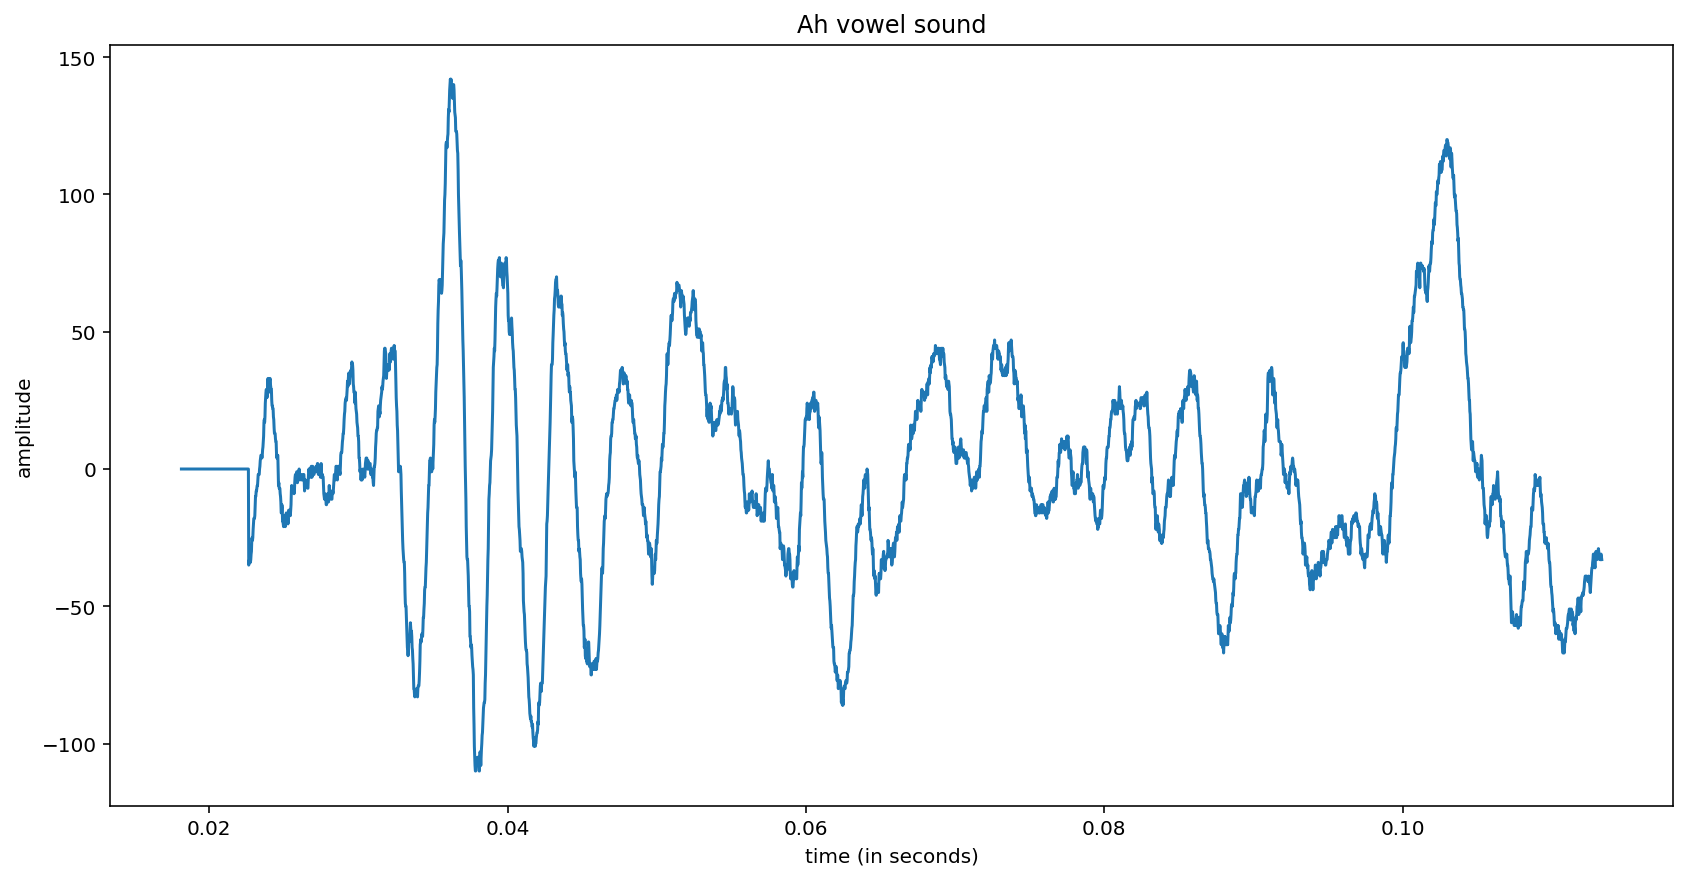

In [3]:
setup_graph(title='Ah vowel sound', x_label='time (in seconds)', y_label='amplitude', fig_size=(14,7))
_ = plt.plot(time_array[800:5000], input_signal[800:5000])

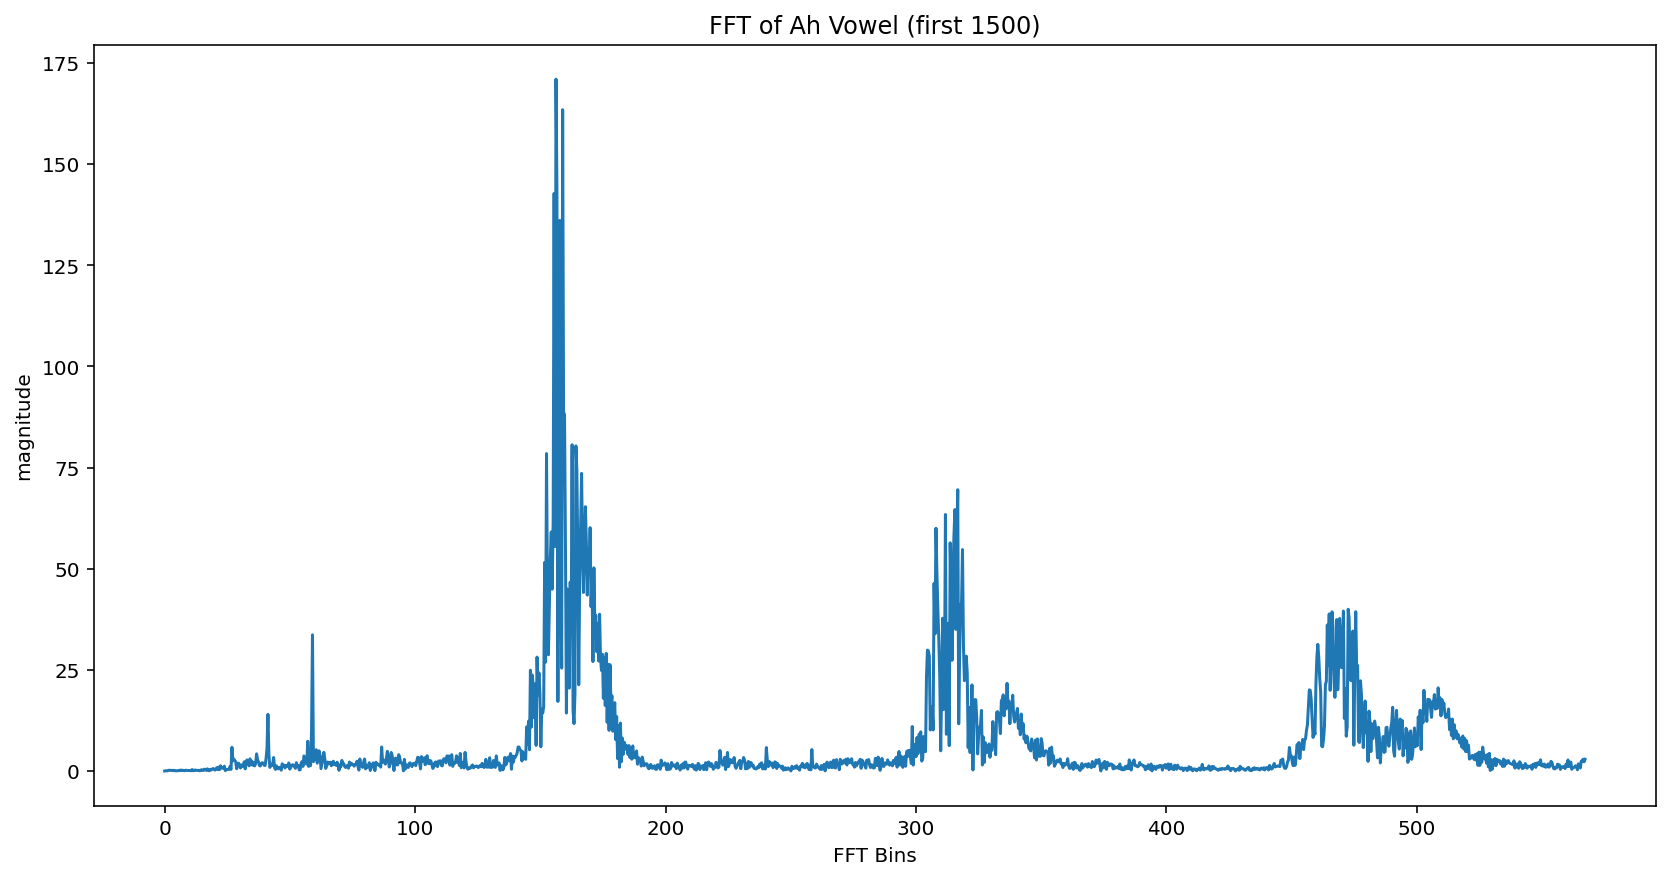

In [10]:
fft_out = np.fft.rfft(input_signal)
fft_mag = [np.sqrt(i.real**2 + i.imag**2)/len(fft_out) for i in fft_out]
num_samples = len(input_signal)
rfreqs = [(i*1.0/num_samples)*sample_rate for i in range(num_samples//2+1)]

setup_graph(title='FFT of Ah Vowel (first 1500)', x_label='FFT Bins', y_label='magnitude', fig_size=(14,7))
_ = plt.plot(rfreqs[0:1500], fft_mag[0:1500])

In [5]:
(doremi_sample_rate, doremi) = scipy.io.wavfile.read("../audio/do-re-mi.wav")

/usr/local/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:7592: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


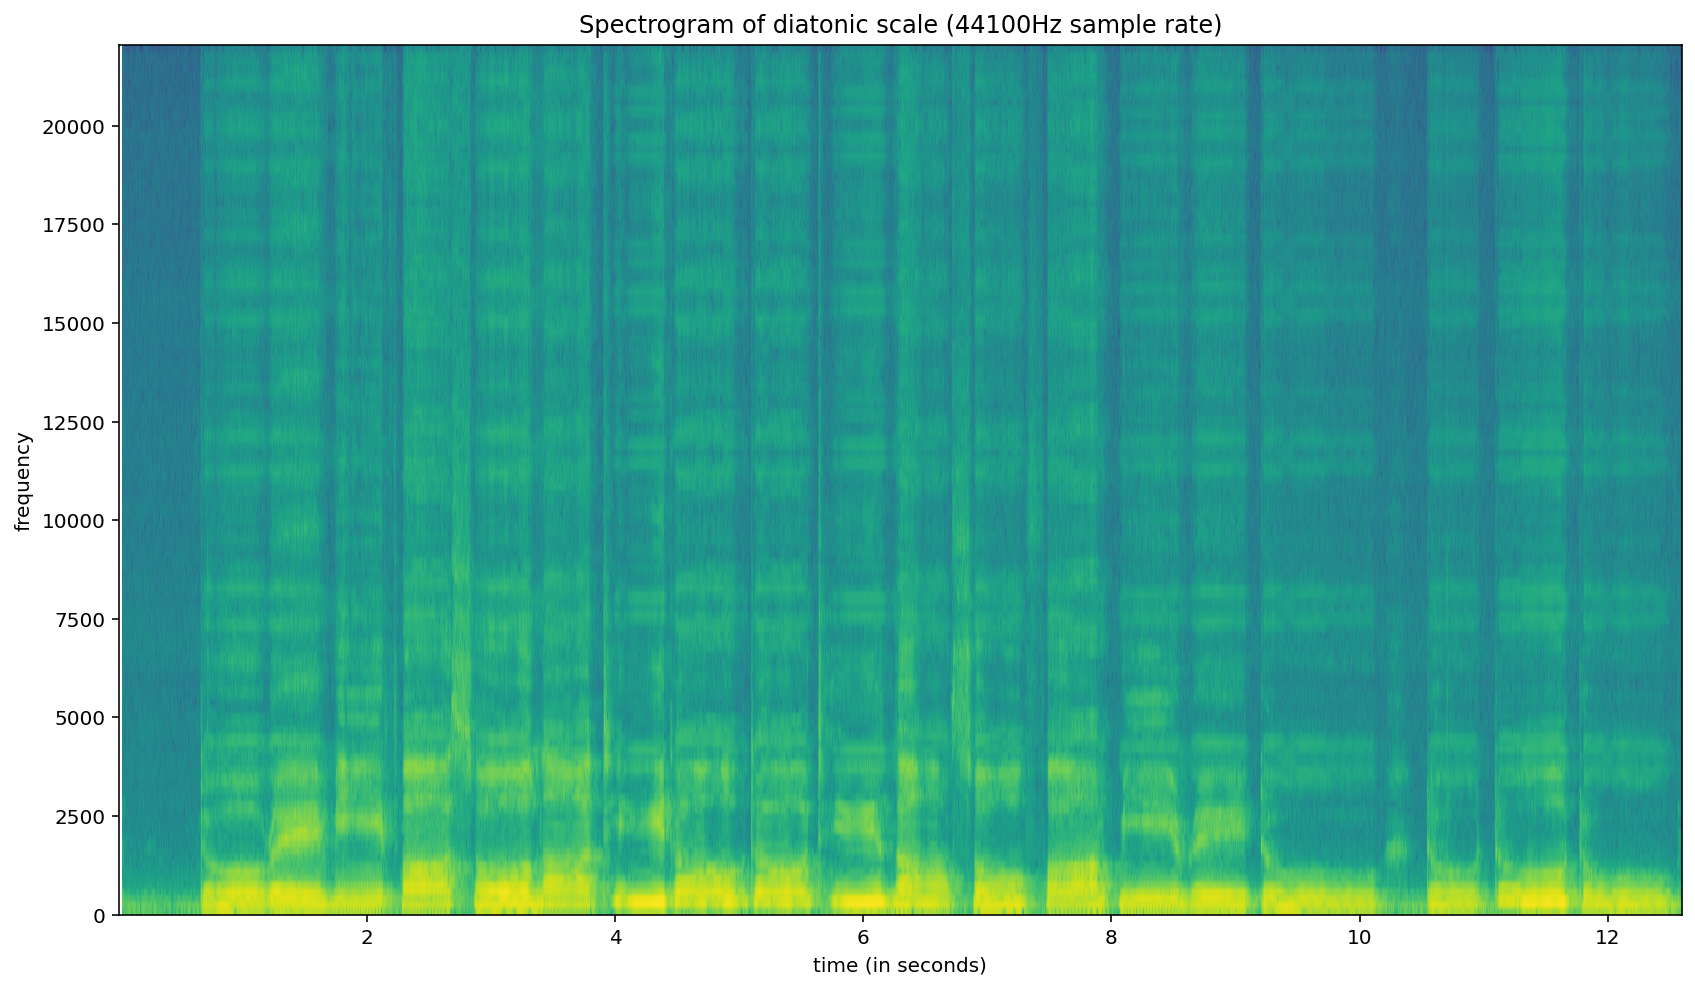

In [6]:
setup_graph(title='Spectrogram of diatonic scale (44100Hz sample rate)', x_label='time (in seconds)', y_label='frequency', fig_size=(14,8))
_ = plt.specgram(doremi, Fs=doremi_sample_rate)

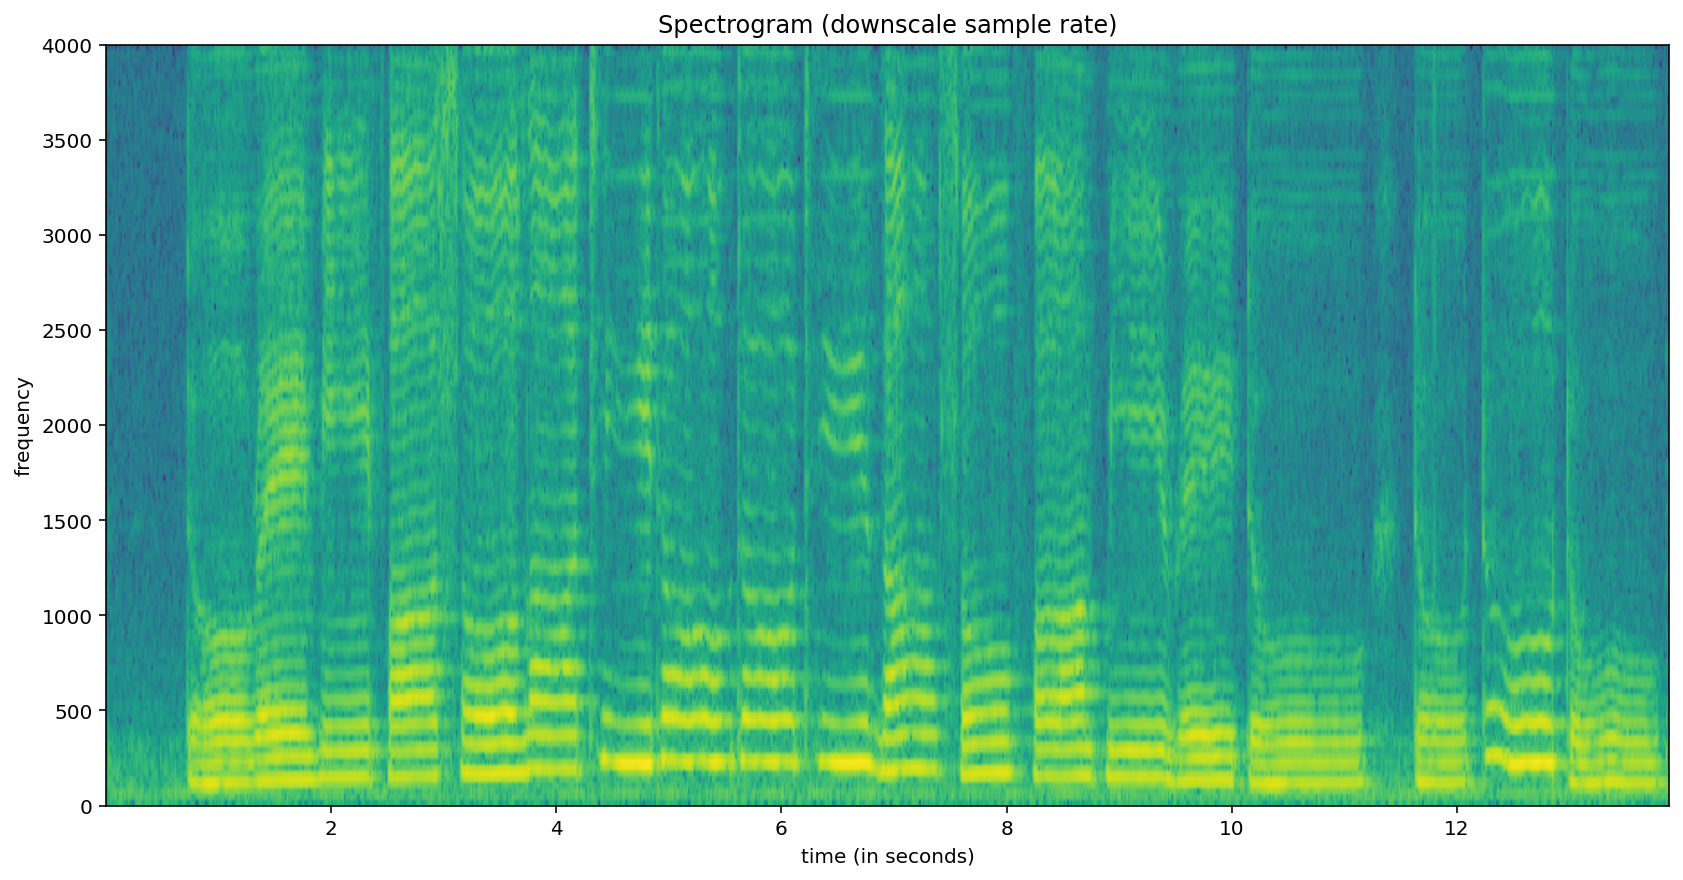

In [7]:
downscale = 8000

doremi_downscale = [doremi[i] for i in range(0, len(doremi), 44100//downscale)]
setup_graph(title='Spectrogram (downscale sample rate)', x_label='time (in seconds)', y_label='frequency', fig_size=(14,7))
_ = plt.specgram(doremi_downscale, Fs=downscale)

In [8]:
del(doremi, doremi_downscale)

Thanks to [Caleb Madrigal](https://calebmadrigal.com/fourier-transform-notes/) - 
Code online at [GitHub](https://github.com/calebmadrigal/FourierTalkOSCON)